# Compare ERA5 Synsat with Meteosat

Here, we will have a look into the Synsat example data created with notebook `02-Run-Synsat-for-ERA5-Data.ipynb`.

## Libraries 

### Setup Env and Load Libraries 

In [1]:
import os, sys
os.environ['RTTOV_PYTHON_WRAPPER'] = '/work/bb1262/tools/rttov/rttov-v13.2/wrapper'

In [2]:
import synsatipy

import synsatipy.utils.colormaps as colormaps
import synsatipy.utils.timetools as timetools


no git hash can be obtained


### Import Standard Libraries 

In [3]:
import xarray as xr
import numpy as np

import pylab as plt
import cartopy.crs as ccrs

## Data Input 

### Input Meteosat Data

In [4]:
obsfile = '/work/bb1174/data/meteosat-seviri-subregions/medi/msevi-medi-20200915_2300.nc'

msg = xr.open_dataset( obsfile )

t = timetools.convert_timevec( msg.time.data )

msg['time'] = t


/work/bb1262/tools/conda/python3.10_synsatipy/lib/python3.10/site-packages/xarray/namedarray/core.py:496: UserWarning: Duplicate dimension names present: dimensions {'ndim'} appear more than once in dims=('ndim', 'ndim'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  warnings.warn(


### Input ERA5 Synsat Data 

In [5]:
synsatfile = './Data/synsat_era5_example_data.nc'

if not os.path.isfile( synsatfile ):
    raise SystemExit('Synsatfile not found')
    
else:
     era_synsat = xr.open_dataset( synsatfile )

## Plotting

In [6]:
pkws = dict(
    subplot_kws=dict(
        projection=ccrs.Geostationary(0), facecolor="lightgray", 
    ),
   # figsize=(18, 6),
    transform=ccrs.PlateCarree(),
)

In [7]:
def map_plotter(v, **spkws):
    
    map = v.plot(**spkws)

    map.axes.coastlines(color = 'white')
    map.axes.set_extent([-5, 35, 28, 48], crs=ccrs.PlateCarree())


    fig = plt.gcf()
    fig.set_size_inches(18, 5)

### Window Channel 

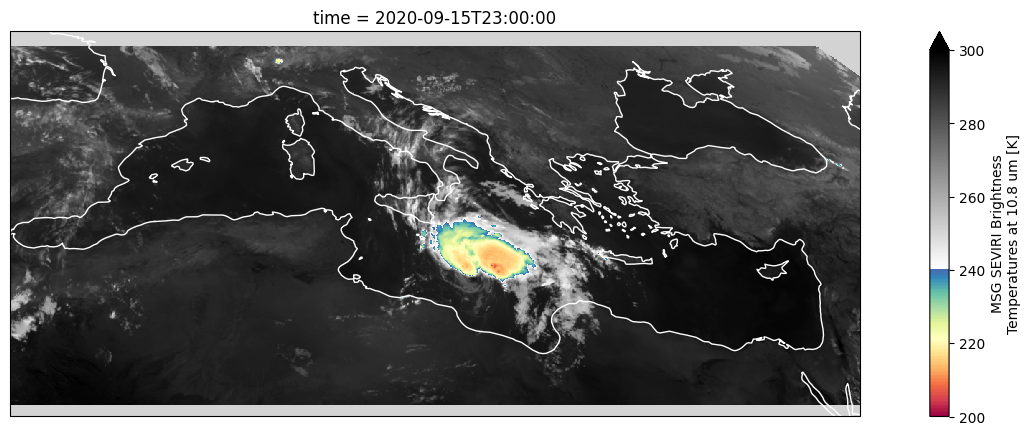

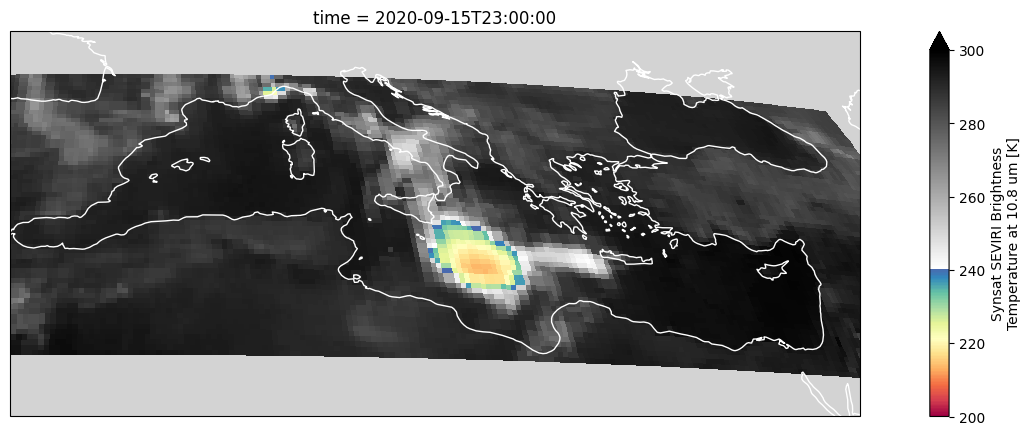

In [8]:
spkws = dict(     
    x="lon",
    y="lat",
    cmap=colormaps.enhanced_colormap(),
    vmin=200,
    vmax=300,
    **pkws )

map_plotter( msg['bt108'], **spkws ) 
plt.figure()
map_plotter( era_synsat['bt108'], **spkws ) 

### Water Vapor Channels 

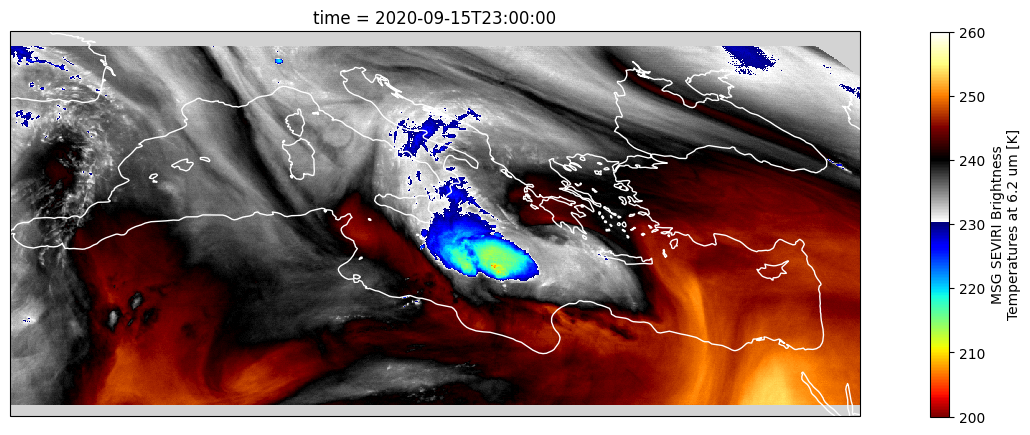

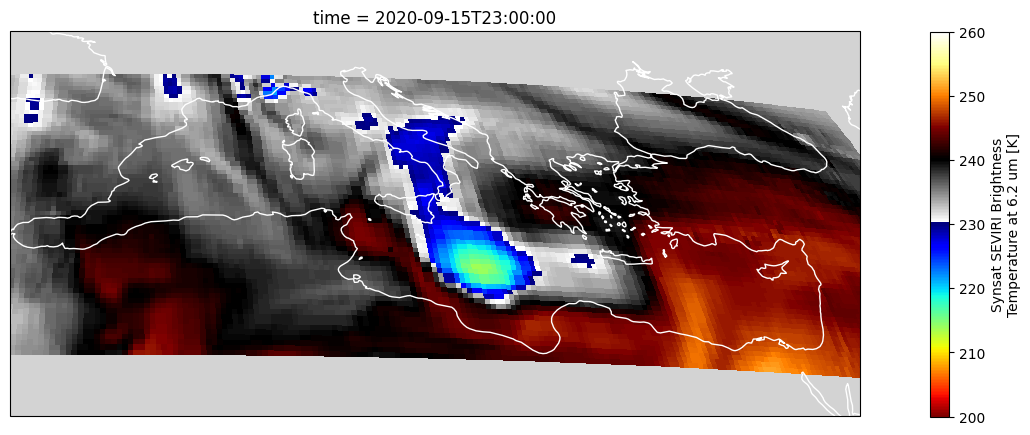

In [9]:
spkws = dict(     
    x="lon",
    y="lat",
    cmap=colormaps.enhanced_wv62_cmap(),
    vmin=200,
    vmax=260,
    **pkws )

map_plotter( msg['bt062'], **spkws ) 
plt.figure()
map_plotter( era_synsat['bt062'], **spkws ) 

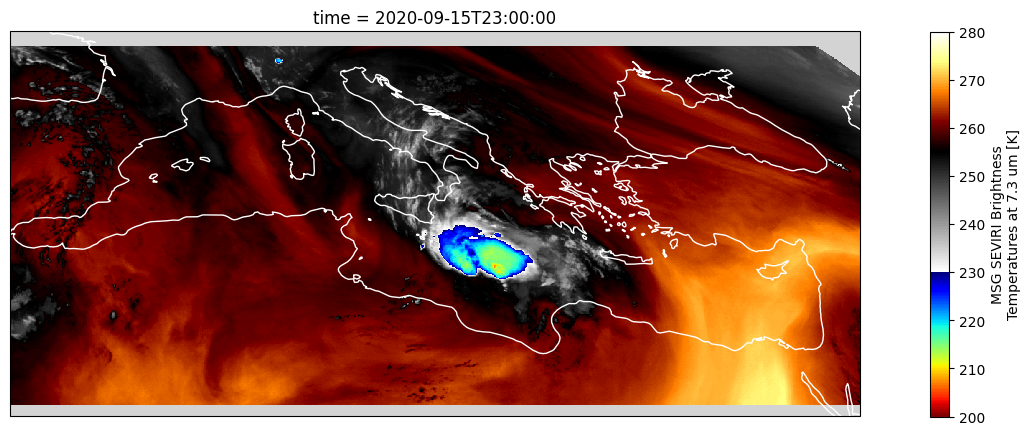

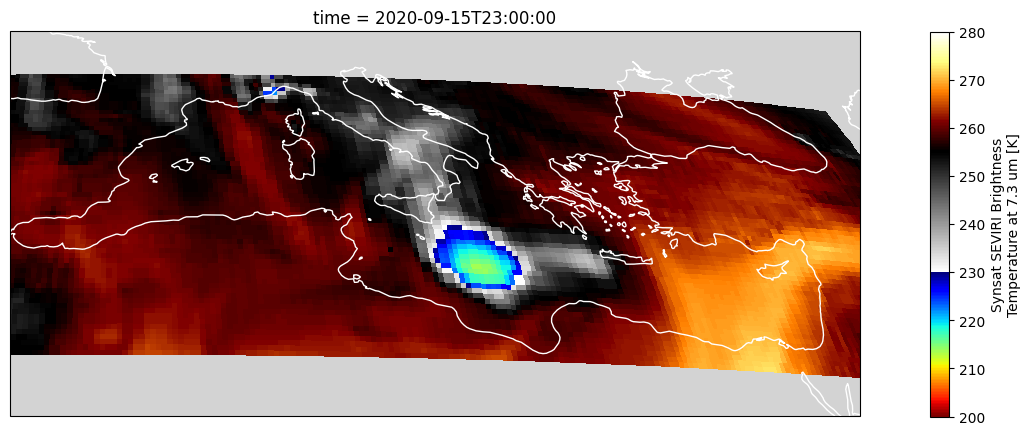

In [10]:
spkws = dict(     
    x="lon",
    y="lat",
    cmap=colormaps.enhanced_wv62_cmap(vmed2 = 255, vmax = 280),
    vmin=200,
    vmax=280,
    **pkws )

map_plotter( msg['bt073'], **spkws ) 
plt.figure()
map_plotter( era_synsat['bt073'], **spkws ) 

### BT Differences 

In [11]:
for d in [msg, era_synsat]:
    d['BTD_108_120']  = d['bt108'] - d['bt120']
    d['BTD_087_120']  = d['bt087'] - d['bt120']
    d['BTD_087_108']  = d['bt087'] - d['bt108']
    

/work/bb1262/tools/conda/python3.10_synsatipy/lib/python3.10/site-packages/xarray/namedarray/core.py:496: UserWarning: Duplicate dimension names present: dimensions {'ndim'} appear more than once in dims=('ndim', 'ndim'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  warnings.warn(
/work/bb1262/tools/conda/python3.10_synsatipy/lib/python3.10/site-packages/xarray/namedarray/core.py:496: UserWarning: Duplicate dimension names present: dimensions {'ndim'} appear more than once in dims=('ndim', 'ndim'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray f

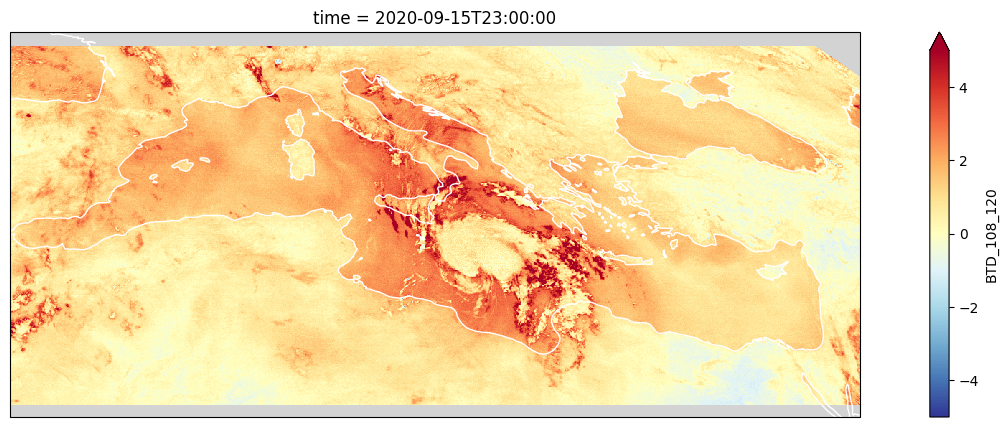

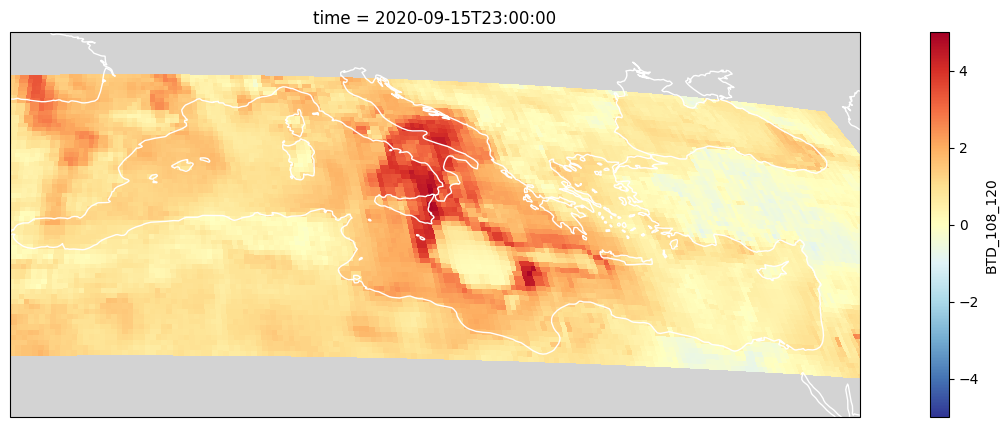

In [12]:
spkws = dict(     
    x="lon",
    y="lat",
    cmap=plt.cm.RdYlBu_r,
    vmin=-5,
    vmax=5,
    **pkws )

map_plotter( msg['BTD_108_120'], **spkws ) 
plt.figure()
map_plotter( era_synsat['BTD_108_120'], **spkws ) 

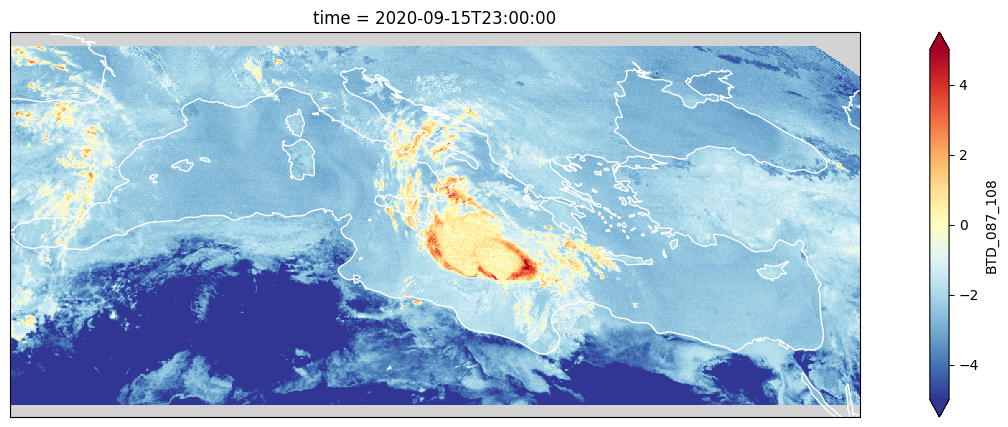

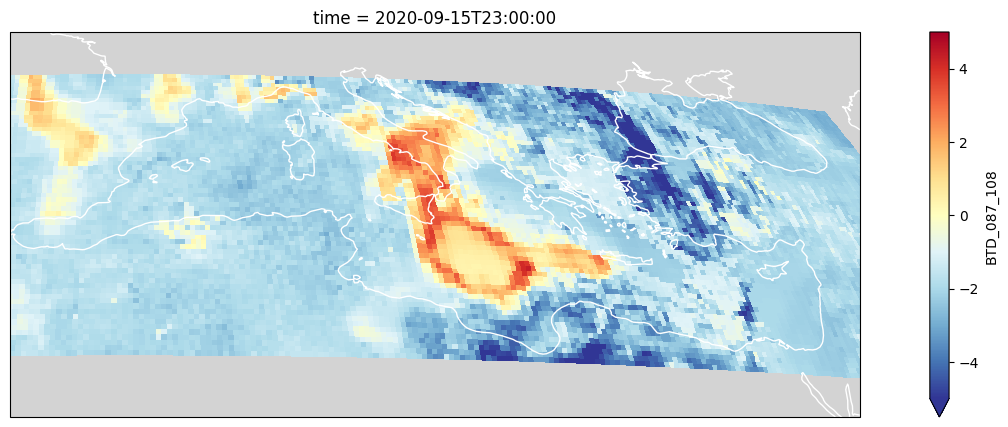

In [13]:
spkws = dict(     
    x="lon",
    y="lat",
    cmap=plt.cm.RdYlBu_r,
    vmin=-5,
    vmax=5,
    **pkws )

map_plotter( msg['BTD_087_108'], **spkws ) 
plt.figure()
map_plotter( era_synsat['BTD_087_108'], **spkws ) 

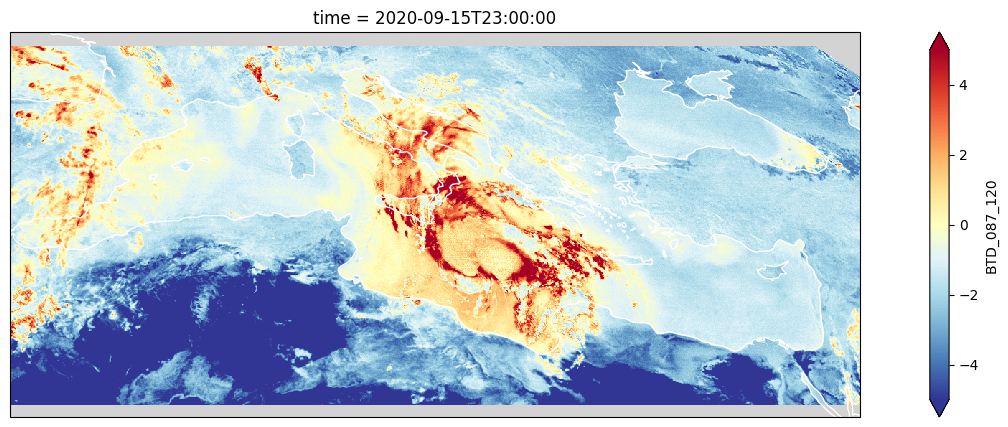

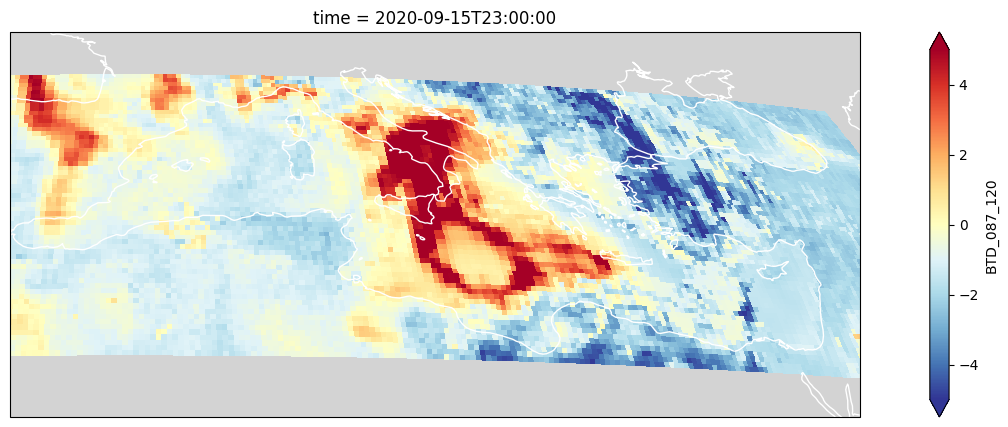

In [14]:
spkws = dict(     
    x="lon",
    y="lat",
    cmap=plt.cm.RdYlBu_r,
    vmin=-5,
    vmax=5,
    **pkws )

map_plotter( msg['BTD_087_120'], **spkws ) 
plt.figure()
map_plotter( era_synsat['BTD_087_120'], **spkws ) 